Here's a good paper to look at for some related work: http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000190



In [21]:
import Cluster as C
import RTRL as network
import NetworkIOStreams as nio
import dimensions_kit as dk
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable     
import scipy.cluster.hierarchy as sch
numNets = 1000                                    
nNodes = 6                                        
net = network.RTRLNetwork;   

In [18]:
def plot_solutions(weight_solutions):
       
      dims = dk.dimensions(len(weight_solutions))
      print dims
      f, axes = plt.subplots(*dims,figsize=(10,10))
      for s in range(len(weight_solutions)):
           sol = weight_solutions[s]
           x, y= dk.transform(dims, s)
           axis = axes[x][y]
           pc = axis.pcolormesh(sol)

           div = make_axes_locatable(axis)
           cax = div.append_axes("right", size="5%", pad=0.01)
           cbar = plt.colorbar(pc, cax=cax)
                        
      i = len(weight_solutions)
      while i < dims[0]*dims[1]:
           x,y = dk.transform(dims,i )
           axes[x][y].axis('off')
           i+=1
      f.tight_layout()
      return f  

In [6]:
def new_aggregator(p):

    """
    p is a 4-vector containing at its indices:
    0 - number of nodes for the aggregator
    2 - delay for the network input
    3 - eta learning rate
    4 - number of iterations to train the network for
    """
    NODES = 0
    DELAY = 1
    ETA = 2  
    ITER = 3

    nnodes = p[NODES]
    delay = p[DELAY]
    eta = p[ETA]
    niterations = p[ITER]

    network = net(nNodes=nnodes, io = nio.XorIOStream(delay = delay), eta = eta)

    agg = C.DataAggregator(network, niterations)
    return agg
                

In [7]:
                     

params = [(6, 2, 0.5,1000)]*numNets                
networks = map(new_aggregator, params)            
results = C.StochasticSolutionGenerator(networks) 

Now lets get into plotting

10
(4, 3)


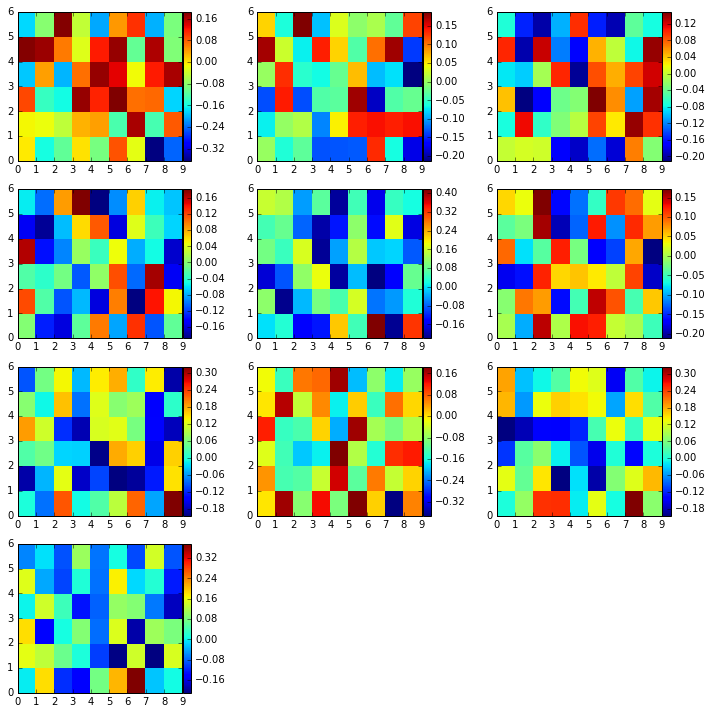

In [19]:
print len(results.solutions[0:10])
plot_solutions(results.solutions[0:10])
plt.show()

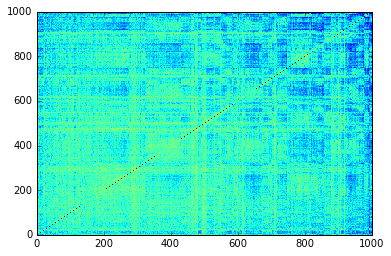

In [22]:
correlations = results.genCorrelationMatrix()

Z = sch.linkage(correlations, method='centroid')
indexs = sch.leaves_list(Z)

clustered_correl = correlations[indexs][:,indexs]
ax = plt.figure().add_subplot(111)
ax.pcolormesh(clustered_correl)  